## Common data problem

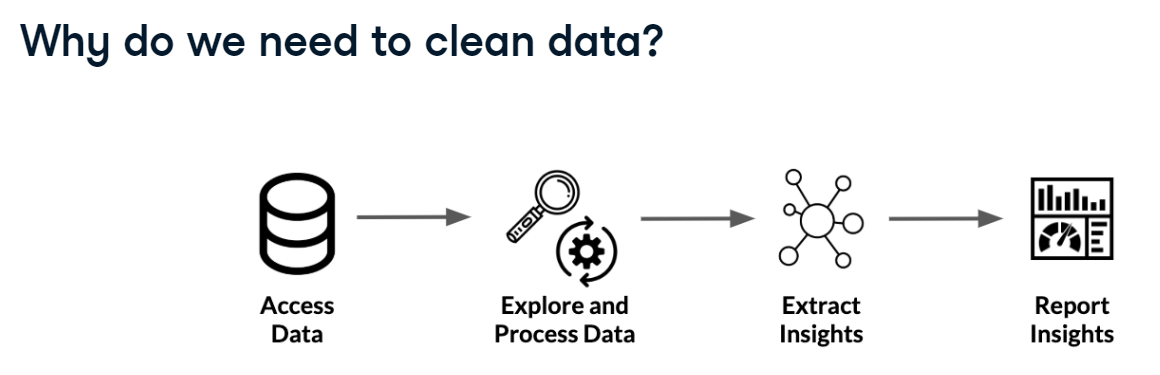

#### Data type constraints

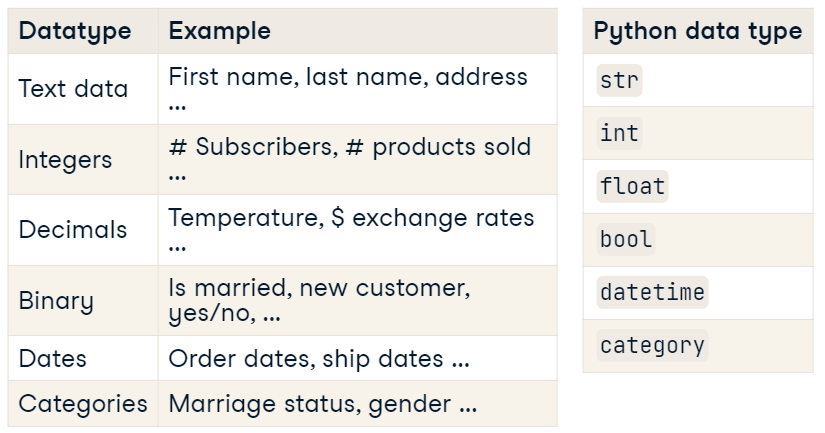

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
ride_sharing = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\ride_sharing_new.csv")

In [85]:
# Print the information of ride_sharing
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [86]:
# Print summary statistics of user_type column
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [87]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Print new summary statistics 
ride_sharing['user_type_cat'].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64

In [88]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Print formed columns and calculate average ride duration 
ride_sharing[['duration','duration_trim','duration_time']]

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


In [89]:
ride_sharing['duration_time'].mean()

11.389052795031056

<br>

#### Uniqueness constraints

<code>inplace</code> : Drop duplicated rows directly inside DataFrame without creating new object (True)

In [90]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = ['bike_id', 'user_gender'], keep = False)
duplicates

0        True
1        True
2        True
3        True
4        True
         ... 
25755    True
25756    True
25757    True
25758    True
25759    True
Length: 25760, dtype: bool

In [91]:
# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns
duplicated_rides[['bike_id','user_gender','user_birth_year']]

,bike_id,user_gender,user_birth_year
10857,11,Male,1987
6088,11,Male,1985
14395,27,Male,1974
25307,27,Male,1972
888,27,Male,1971
...,...,...,...
8812,6638,Female,1986
8380,6638,Male,1984
8300,6638,Male,1962
8456,6638,Male,1983


In [92]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset='bike_id', keep=False)
duplicated_rides = ride_unique[duplicates]

<br>

## Text and categorical data problems

#### Membership constraints

In [93]:
airlines = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\airlines_final.csv")
airlines.head(3)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral


In [94]:
categories = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}

In [95]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [96]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
airlines[~cat_clean_rows]

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []


,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


<br>

#### Categorical variables

In [97]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [98]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [99]:
# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [100]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

<br>

#### Cleaning text data

In [103]:
# Replace "Dr." with empty string ""
# airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

<br>

## Advanced data problems

#### Uniformity

In [108]:
banking = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\banking_dirty.csv")
banking.head(3)

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18


In [120]:
banking['Age'] = banking['Age'] + 3

In [121]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
banking['acct_year']

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object

<br>

#### Cross field validation

In [122]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Print the number of inconsistent investments
print("Number of inconsistent investments:", inconsistent_inv.shape[0])

Number of inconsistent investments: 8


In [123]:
# Import datetime module
import datetime

# Convert 'birth_date' to datetime
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = datetime.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = banking['Age'] == ages_manual

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Print the number of inconsistent ages
print("Number of inconsistent ages:", inconsistent_ages.shape[0])

Number of inconsistent ages: 8


<br>

#### Completeness

In [131]:
print(banking.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


In [132]:
!pip install missingno

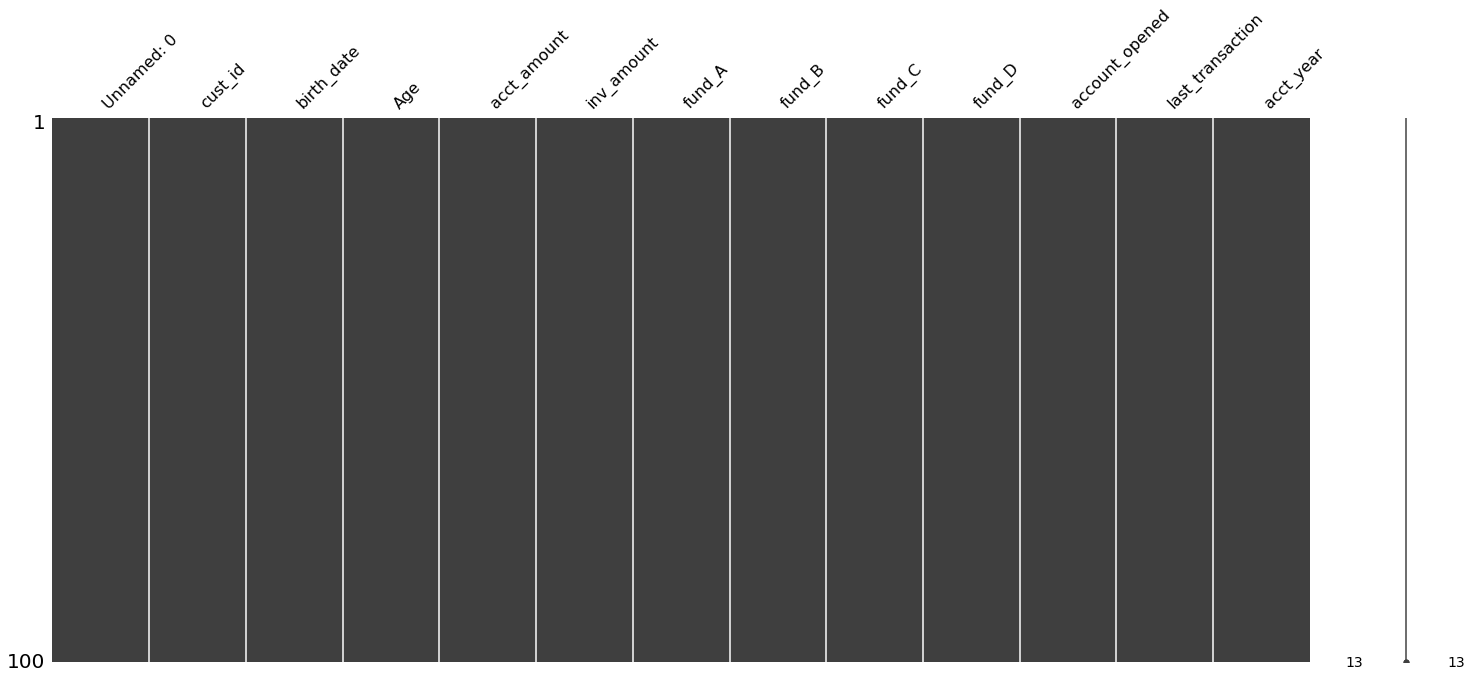

In [133]:
import missingno as msno

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

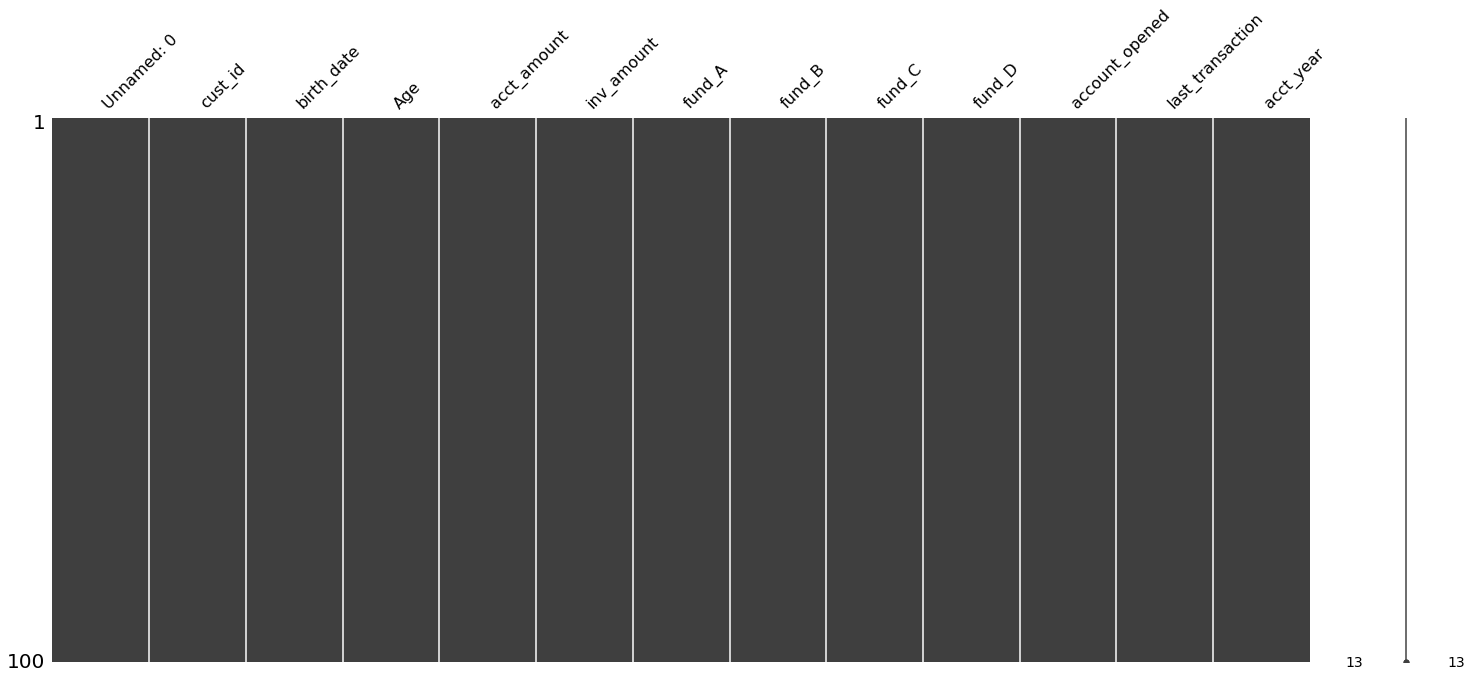

In [136]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'Age')
msno.matrix(banking_sorted)
plt.show()

In [137]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset=['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount': acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
acct_year           0
dtype: int64


<br>

## Record linkage

#### Comparing strings

In [146]:
restaurants = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\restaurants_L2.csv")
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [147]:
!pip install fuzzywuzzy

In [155]:
# Import process from thefuzz
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
process.extract('asian', unique_types, limit = len(unique_types))

[('asian', 100),
 ('italian', 67),
 ('american', 62),
 ('mexican', 50),
 ('cajun', 40),
 ('southwestern', 36),
 ('southern', 31),
 ('coffeebar', 26),
 ('steakhouses', 25)]

In [154]:
# Calculate similarity of 'american' to all values of unique_types
process.extract('american', unique_types, limit = len(unique_types))

[('american', 100),
 ('mexican', 80),
 ('cajun', 68),
 ('asian', 62),
 ('italian', 53),
 ('southwestern', 41),
 ('southern', 38),
 ('coffeebar', 24),
 ('steakhouses', 21)]

In [153]:
# Calculate similarity of 'italian' to all values of unique_types
process.extract('italian', unique_types, limit = len(unique_types))

[('italian', 100),
 ('asian', 67),
 ('mexican', 43),
 ('american', 40),
 ('cajun', 33),
 ('southern', 27),
 ('southwestern', 26),
 ('steakhouses', 26),
 ('coffeebar', 12)]

In [158]:
# Inspect the unique values of the cuisine_type column
restaurants['type'].unique()

array(['american', 'asian', 'italian', 'coffeebar', 'mexican',
       'southwestern', 'steakhouses', 'southern', 'cajun'], dtype=object)

In [160]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 6), ('italian', 100, 10), ('italian', 100, 11), ('italian', 100, 16), ('italian', 100, 19)]


In [163]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['type'], limit=len(restaurants.type))

# Iterate through the list of matches to italian
for match in matches:
    # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
        # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
        restaurants.loc[restaurants['type'] == match[0], 'type'] = 'italian'

In [164]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0], 'type'] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())

['american' 'asian' 'italian' 'coffeebar' 'mexican' 'southwestern'
 'steakhouses' 'southern' 'cajun']
